In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats

In [31]:
with open('data/sim2_data_trial2.pkl','rb') as file:
    data = pickle.load(file)

In [32]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

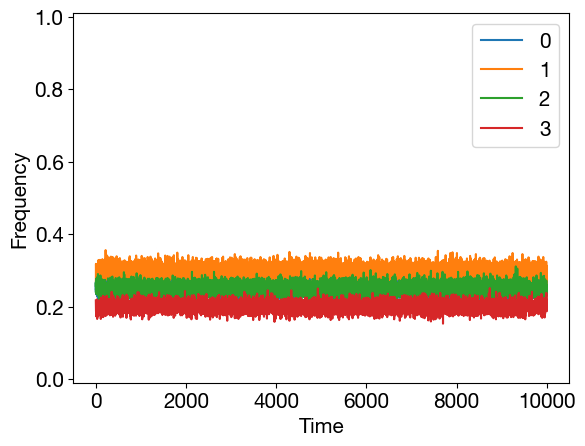

In [33]:
plt.plot(data['freq_timeseries'].T)
plt.ylim(-0.01,1.01)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(np.arange(4))

In [34]:
data['freq_timeseries'][:,-1]

array([0.25 , 0.3  , 0.244, 0.206])

In [35]:
print(sum(data['freq_timeseries'][:,-1]))

1.0
